# Exoplanet detection with Kepler Objects of Interest (KOI)
## project by Daniel Marek, sem VI Informatics

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('cumulative.csv')

#remove the rowid column
dataset = dataset.iloc[::, 1::]
#display the data
dataset

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [38]:
dataset.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

## Transit Properties
*koi_period* - The interval between consecutive planetary transits.<br>
*koi_time0* - First observation time <br>
*koi_impact*  -The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.<br>
*koi_duration* - The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Computed with best fit methods. <br>
*koi_depth* - The fraction of stellar flux lost at the minimum of the planetary transit. <br> 
*koi_prad* - The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius. <br>
*koi_teq* - Approximation for the temperature of the planet. <br>
*koi_insol* - Insolation flux is another way to give the equilibrium temperature. <br>

## Stellar Parameters
*koi_steff* - The photospheric temperature of the star. <br>
*koi_slogg* - The base-10 logarithm of the acceleration due to gravity at the surface of the star. <br>
*koi_srad* - The photospheric radius of the star. <br>


In [39]:
#Extract usefull data
dataset = dataset.drop('koi_tce_delivname', axis=1) #This column contains only a string

#the following columns are empty
dataset = dataset.drop('koi_teq_err1', axis=1)
dataset = dataset.drop('koi_teq_err2', axis=1)
dataset = dataset.dropna(subset=dataset.columns[10::])

featuresDf = dataset.iloc[::, 10::]
print(featuresDf.columns)

print() # for a bit of space (pun not intended)
#Extract the target -- we are only interested in koi_disposition
target = dataset.iloc[::, 3]
print(target)

Index(['koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

0            CONFIRMED
1            CONFIRMED
2       FALSE POSITIVE
3       FALSE POSITIVE
4            CONFIRMED
             ...      
9559    FALSE POSITIVE
9560    FALSE POSITIVE
9561         CANDIDATE
9562    FALSE POSITIVE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 8744, dtype: object


In [40]:
#mapping the target outcomes
d = {'CONFIRMED': 1, 'CANDIDATE': 0, 'FALSE POSITIVE': 0, 'NOT DISPOSITIONED': 0}
target = target.map(d)
print(target)
print(target.value_counts())

0       1
1       1
2       0
3       0
4       1
       ..
9559    0
9560    0
9561    0
9562    0
9563    0
Name: koi_disposition, Length: 8744, dtype: int64
0    6472
1    2272
Name: koi_disposition, dtype: int64


In [41]:
#converting everything to numpy
data = featuresDf.to_numpy()
target = target.to_numpy()
print("Shape of data: ", data.shape)
print("Shape of target: ", target.shape)


Shape of data:  (8744, 36)
Shape of target:  (8744,)


In [42]:
from sklearn.model_selection import train_test_split
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, stratify=target)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (6558, 36)
y_train shape: (6558,)

X_test shape: (2186, 36)
y_test shape: (2186,)


In [ ]:
import seaborn as sns
#taking a look at training data
#not so good really


#create dataset from X_train data
#mark columns with feature names
kepler_dataframe = pd.DataFrame(X_train, columns=featuresDf.columns)
sns.heatmap(kepler_dataframe, annot=True)

<AxesSubplot:>

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
print("Training set accuracy: {}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree.score(X_test, y_test)))

Training set accuracy: 1.0
Test set accuracy: 0.6939615736505031


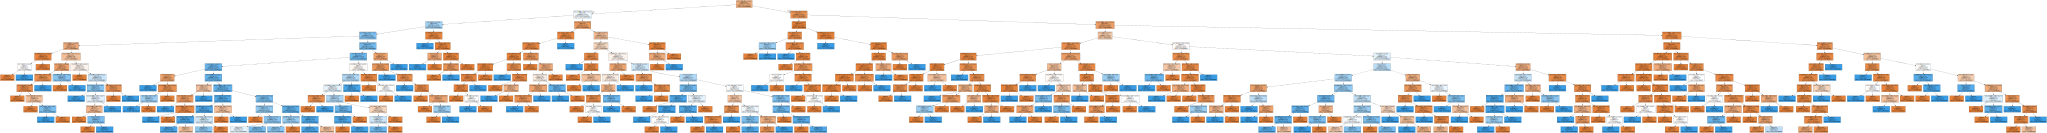

In [10]:
import graphviz
from sklearn import tree as treeGraph
# DOT data
dot_data = treeGraph.export_graphviz(tree, out_file=None, 
                                feature_names=featuresDf.columns,  
                                class_names=['CONFIRMED', 'NOT CONFIRMED'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

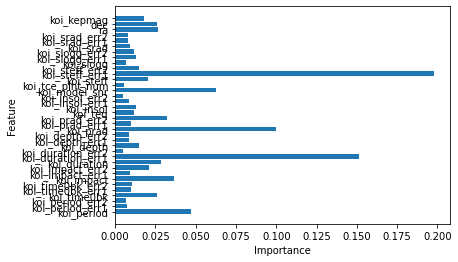

In [126]:
#plot the feature importance
def plot_feature_importance(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), featuresDf.columns)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
plot_feature_importance(tree)

In [25]:
#Train another tree, this time with max depth
tree = DecisionTreeClassifier(max_depth=4, random_state = 42)
tree.fit(X_train, y_train)
print("Training set accuracy: {}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree.score(X_test, y_test)))

Training set accuracy: 0.8522415370539799
Test set accuracy: 0.8325709057639524


In [26]:
# DOT data
#plot the tree once again
dot_data = treeGraph.export_graphviz(tree, out_file=None, 
                                feature_names=featuresDf.columns,  
                                class_names=['CONFIRMED', 'NOT CONFIRMED'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.format = 'png'
graph.render('dtree_render_small',view=True)

'dtree_render_small.png'

Gtk-Message: 08:21:29.514: Failed to load module "appmenu-gtk-module"

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.515: Nie można odnaleźć modułu obsługującego motyw w module_path: „adwaita”,

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.518: Nie można odnaleźć modułu obsługującego motyw w module_path: „murrine”,

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.518: Nie można odnaleźć modułu obsługującego motyw w module_path: „murrine”,

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.519: Nie można odnaleźć modułu obsługującego motyw w module_path: „murrine”,

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.519: Nie można odnaleźć modułu obsługującego motyw w module_path: „murrine”,

(gimp-2.10:6346): Gtk-WARNING **: 08:21:29.519: Nie można odnaleźć modułu obsługującego motyw w module_path: „murrine”,
Gtk-Message: 08:21:29.816: Failed to load module "appmenu-gtk-module"

(file-png:6367): Gtk-WARNING **: 08:21:29.816: Nie można odnaleźć modułu obsługującego motyw w module_path: „adwaita”,

(file-png:636

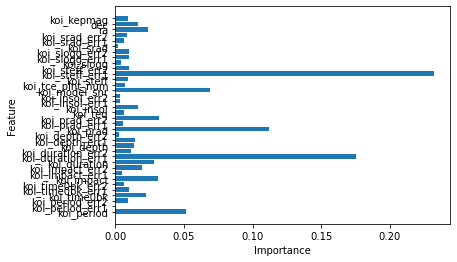

In [146]:
plot_feature_importance(tree)

In [28]:
train_acc = []
test_acc = []
for x in range (1, 20):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
    
test_acc

[0.7429094236047575,
 0.7936870997255261,
 0.8243366880146387,
 0.8325709057639524,
 0.8426349496797805,
 0.8476669716376944,
 0.8549862763037511,
 0.8577310155535224,
 0.8572735590118938,
 0.8490393412625801,
 0.8472095150960659,
 0.853156450137237,
 0.8440073193046661,
 0.8440073193046661,
 0.8426349496797805,
 0.8394327538883806,
 0.8453796889295517,
 0.838975297346752,
 0.8307410795974383]

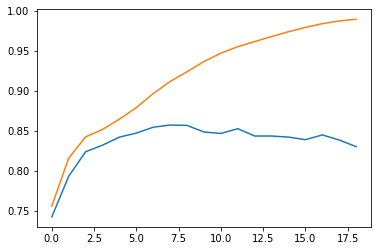

In [31]:

plt.plot(test_acc)
plt.plot(train_acc)

# Trying to predict the same thing but this time using deep-learning

(6558, 36)
Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.7692 - binary_accuracy: 0.5412 - val_loss: 1.1598 - val_binary_accuracy: 0.4314
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6626 - binary_accuracy: 0.6162 - val_loss: 0.7048 - val_binary_accuracy: 0.5284
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5949 - binary_accuracy: 0.6708 - val_loss: 0.6366 - val_binary_accuracy: 0.5970
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5501 - binary_accuracy: 0.7113 - val_loss: 0.5657 - val_binary_accuracy: 0.7475
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5204 - binary_accuracy: 0.7360 - val_loss: 0.5309 - val_binary_accuracy: 0.7402
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4934 - binary_accuracy: 0.7528 - val_loss: 0.5141 - val_binary_accuracy: 0.7402
Epoch 7/100
13/13 [==============================] - 0s 8m

<AxesSubplot:title={'center':'Accuracy'}>

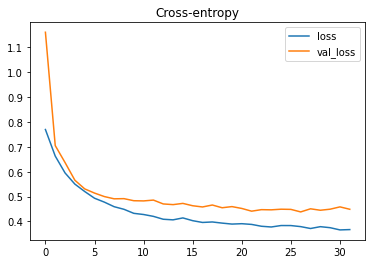

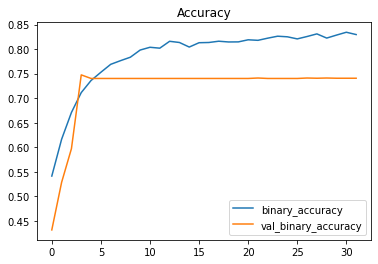

In [82]:
#import keras
from tensorflow import keras
from tensorflow.keras import layers

print(X_train.shape)

#create the model

model = keras.Sequential([
    layers.Flatten(input_shape=[36]),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],)

#Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,)

#fit model to data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],)

#plot the outcomes
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/100
13/13 [==============================] - 2s 26ms/step - loss: 0.7672 - binary_accuracy: 0.5522 - val_loss: 0.5841 - val_binary_accuracy: 0.7402
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6629 - binary_accuracy: 0.6109 - val_loss: 0.5649 - val_binary_accuracy: 0.7397
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6157 - binary_accuracy: 0.6438 - val_loss: 0.5605 - val_binary_accuracy: 0.7397
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5844 - binary_accuracy: 0.6670 - val_loss: 0.5554 - val_binary_accuracy: 0.7402
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5538 - binary_accuracy: 0.6900 - val_loss: 0.5427 - val_binary_accuracy: 0.7402
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5296 - binary_accuracy: 0.7144 - val_loss: 0.5325 - val_binary_accuracy: 0.7402
Epoch 7/100
13/13 [==============================] - 0s 10ms/step -

<AxesSubplot:title={'center':'Accuracy'}>

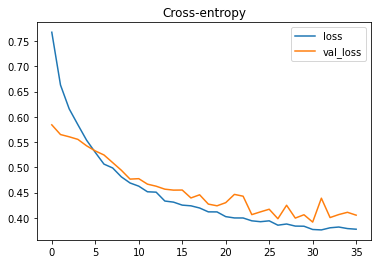

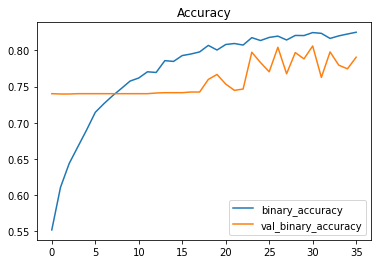

In [83]:
#two more layer

model = keras.Sequential([
    layers.Flatten(input_shape=[36]),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


#Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],)

#Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,)

#fit model to data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],)

#plot the outcomes
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Conclussions: Reducing the depth of the tree reduce the overfitting and imporoves accuracy

In [43]:
y_train

array([1, 0, 0, ..., 1, 1, 1])